# Import required libraries

In [58]:
from sklearn import datasets 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
from scipy import misc

# Load our dataset

In [59]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Display example of each digit file 

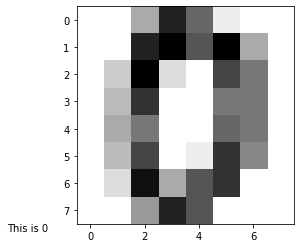

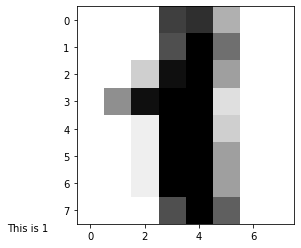

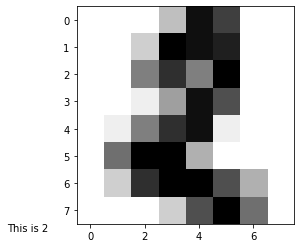

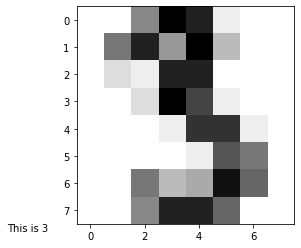

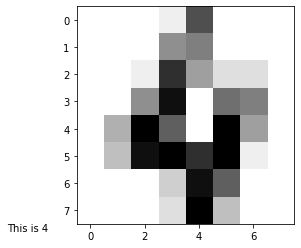

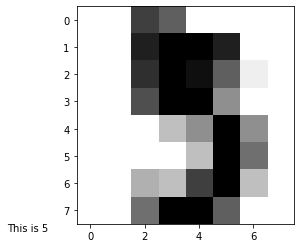

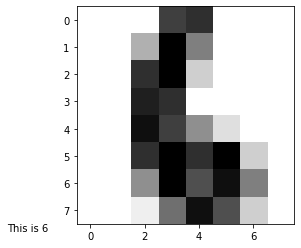

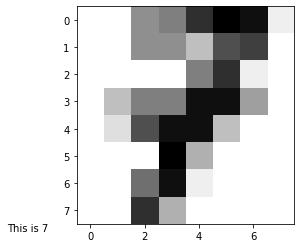

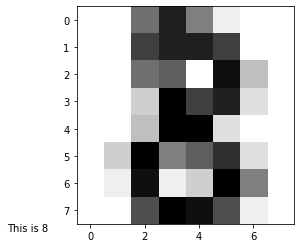

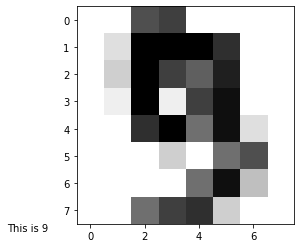

In [60]:
for i in range(0,10):
    fig = plt.figure()
    plt.imshow(digits.images[i],cmap = plt.cm.gray_r)
    txt = "This is %d"%digits.target[i]
    fig.text(0.1,0.1,txt)
    plt.show()

# Plot a projection on the 2 first principal axis

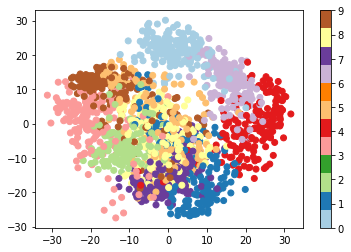

In [61]:
plt.figure()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

# Each digit is an 8x8 array. An example is shown below:

In [62]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

# Assign data and targets to variables

In [63]:
X = digits.data 
y = digits.target

# Split the data
In this case "test data" is really validation data as we will be using it to evaluate performamce and we will be testing on a dataset we will make ourselves

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Determine optimal k-value 

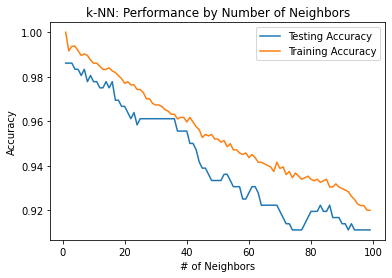

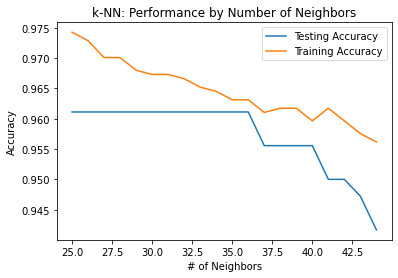

In [69]:
neighbors = np.arange(1, 100)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
#Define the knn classifier
  knn = KNeighborsClassifier(n_neighbors = k)
#Fit the classifier to the training data 
  knn.fit(X_train, y_train)
#Compute accuracy on the training set 
  train_accuracy[i] = knn.score(X_train, y_train)
#Compute accuracy on the testing set 
  test_accuracy[i] = knn.score(X_test, y_test)
    
    
#Plot results
plt.title('k-NN: Performance by Number of Neighbors') 
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy') 
plt.legend() 
plt.xlabel('# of Neighbors') 
plt.ylabel('Accuracy')
plt.show()

 
#SAME GRAPH BUT ZOOMED IN VERSION, POSSIBLY BETTER VERSION FOR ANALYSIS
neighbors = np.arange(25, 45)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
#Define the knn classifier
  knn = KNeighborsClassifier(n_neighbors = k)
#Fit the classifier to the training data 
  knn.fit(X_train, y_train)
#Compute accuracy on the training set 
  train_accuracy[i] = knn.score(X_train, y_train)
#Compute accuracy on the testing set 
  test_accuracy[i] = knn.score(X_test, y_test)
    
    
#Plot results
plt.title('k-NN: Performance by Number of Neighbors') 
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy') 
plt.legend() 
plt.xlabel('# of Neighbors') 
plt.ylabel('Accuracy')
plt.show()

# Set optimized hyperparamters

In [70]:
knn = KNeighborsClassifier(n_neighbors = 36)

# Train on all the data (training and validation)

In [71]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=36)

# MAKE PREDICTIONS WITH OUR OWN DATA

# Predict 1's (90% Accuracy)

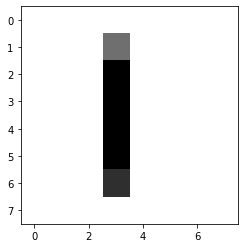

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[1]


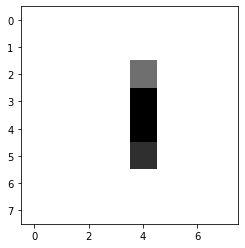

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[1]


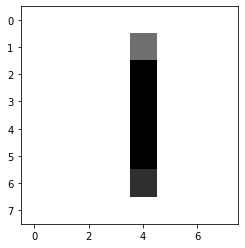

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[1]


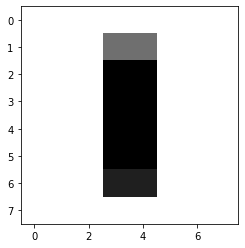

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  9  9  0  0  0]
 [ 0  0  0 16 16  0  0  0]
 [ 0  0  0 16 16  0  0  0]
 [ 0  0  0 16 16  0  0  0]
 [ 0  0  0 16 16  0  0  0]
 [ 0  0  0 14 14  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[1]


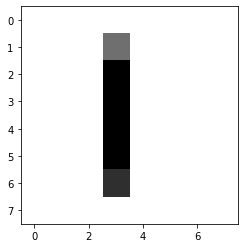

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[1]


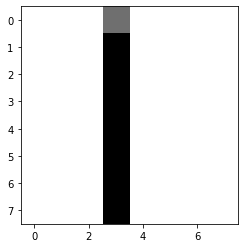

source data in 8x8:
 [[ 0  0  0  9  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]]
[1]


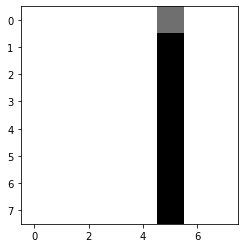

source data in 8x8:
 [[ 0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]]
[9]


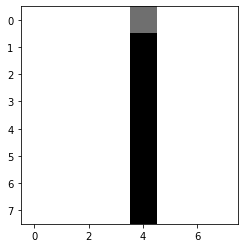

source data in 8x8:
 [[ 0  0  0  0  9  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]]
[1]


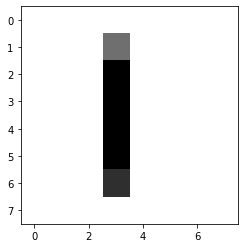

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[1]


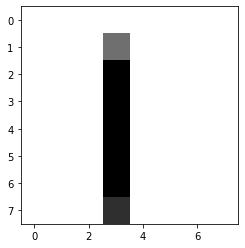

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 13  0  0  0  0]]
[1]


In [73]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test1_1.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test1_2.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test1_3.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test1_4.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test1_5.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test1_6.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test1_7.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test1_8.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test1_9.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test1_10.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

# Predict 2's (90% Accuracy)

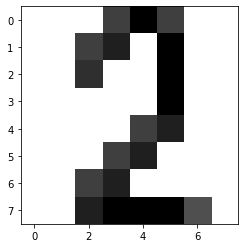

source data in 8x8:
 [[ 0  0  0 12 16 12  0  0]
 [ 0  0 12 14  0 16  0  0]
 [ 0  0 13  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0 12 14  0  0  0  0]
 [ 0  0 14 16 16 16 11  0]]
[2]


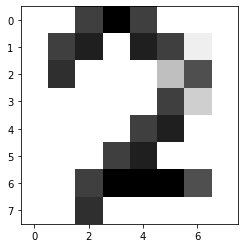

source data in 8x8:
 [[ 0  0 12 16 12  0  0  0]
 [ 0 12 14  0 14 12  1  0]
 [ 0 13  0  0  0  4 11  0]
 [ 0  0  0  0  0 12  3  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0 12 16 16 16 11  0]
 [ 0  0 13  0  0  0  0  0]]
[2]


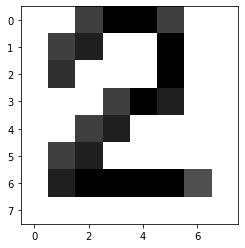

source data in 8x8:
 [[ 0  0 12 16 16 12  0  0]
 [ 0 12 14  0  0 16  0  0]
 [ 0 13  0  0  0 16  0  0]
 [ 0  0  0 12 16 14  0  0]
 [ 0  0 12 14  0  0  0  0]
 [ 0 12 14  0  0  0  0  0]
 [ 0 14 16 16 16 16 11  0]
 [ 0  0  0  0  0  0  0  0]]
[8]


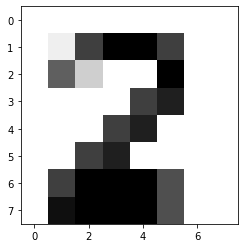

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  1 12 16 16 12  0  0]
 [ 0 10  3  0  0 16  0  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0 12 14  0  0  0  0]
 [ 0 12 16 16 16 11  0  0]
 [ 0 15 16 16 16 11  0  0]]
[2]


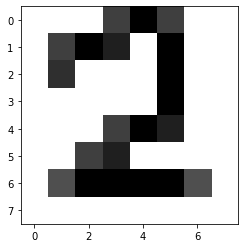

source data in 8x8:
 [[ 0  0  0 12 16 12  0  0]
 [ 0 12 16 14  0 16  0  0]
 [ 0 13  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0 12 16 14  0  0]
 [ 0  0 12 14  0  0  0  0]
 [ 0 11 16 16 16 16 11  0]
 [ 0  0  0  0  0  0  0  0]]
[2]


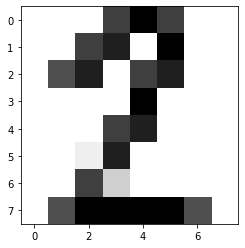

source data in 8x8:
 [[ 0  0  0 12 16 12  0  0]
 [ 0  0 12 14  0 16  0  0]
 [ 0 11 14  0 12 14  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0  1 14  0  0  0  0]
 [ 0  0 12  3  0  0  0  0]
 [ 0 11 16 16 16 16 11  0]]
[2]


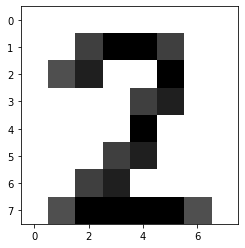

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0 12 16 16 12  0  0]
 [ 0 11 14  0  0 16  0  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0 12 14  0  0  0  0]
 [ 0 11 16 16 16 16 11  0]]
[2]


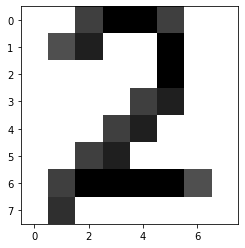

source data in 8x8:
 [[ 0  0 12 16 16 12  0  0]
 [ 0 11 14  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0 12 14  0  0  0  0]
 [ 0 12 16 16 16 16 11  0]
 [ 0 13  0  0  0  0  0  0]]
[2]


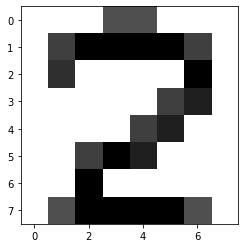

source data in 8x8:
 [[ 0  0  0 11 11  0  0  0]
 [ 0 12 16 16 16 16 12  0]
 [ 0 13  0  0  0  0 16  0]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0 12 16 14  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0 11 16 16 16 16 11  0]]
[2]


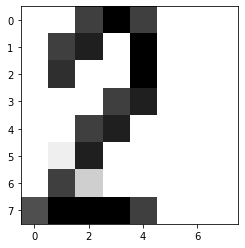

source data in 8x8:
 [[ 0  0 12 16 12  0  0  0]
 [ 0 12 14  0 16  0  0  0]
 [ 0 13  0  0 16  0  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0 12 14  0  0  0  0]
 [ 0  1 14  0  0  0  0  0]
 [ 0 12  3  0  0  0  0  0]
 [11 16 16 16 12  0  0  0]]
[2]


In [48]:
img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test2_1.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test2_2.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test2_3.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test2_4.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test2_5.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test2_6.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test2_7.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test2_8.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test2_9.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test2_10.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

# Predict 3's (80% Accuracy)

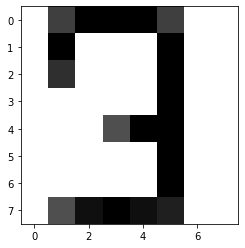

source data in 8x8:
 [[ 0 12 16 16 16 12  0  0]
 [ 0 16  0  0  0 16  0  0]
 [ 0 13  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0 11 16 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0 11 15 16 15 14  0  0]]
[3]


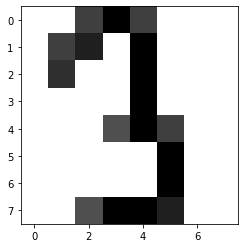

source data in 8x8:
 [[ 0  0 12 16 12  0  0  0]
 [ 0 12 14  0 16  0  0  0]
 [ 0 13  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0 11 16 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0 11 16 16 14  0  0]]
[3]


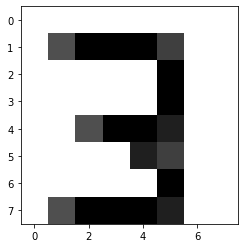

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0 11 16 16 16 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0 11 16 16 14  0  0]
 [ 0  0  0  0 14 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0 11 16 16 16 14  0  0]]
[3]


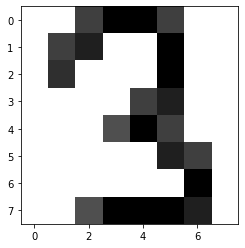

source data in 8x8:
 [[ 0  0 12 16 16 12  0  0]
 [ 0 12 14  0  0 16  0  0]
 [ 0 13  0  0  0 16  0  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0 11 16 12  0  0]
 [ 0  0  0  0  0 14 12  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0 11 16 16 16 14  0]]
[3]


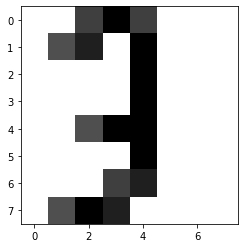

source data in 8x8:
 [[ 0  0 12 16 12  0  0  0]
 [ 0 11 14  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0 11 16 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0 11 16 14  0  0  0  0]]
[7]


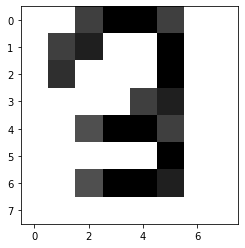

source data in 8x8:
 [[ 0  0 12 16 16 12  0  0]
 [ 0 12 14  0  0 16  0  0]
 [ 0 13  0  0  0 16  0  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0 11 16 16 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0 11 16 16 14  0  0]
 [ 0  0  0  0  0  0  0  0]]
[3]


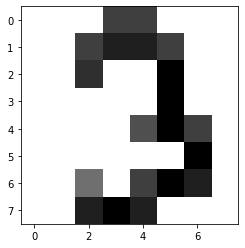

source data in 8x8:
 [[ 0  0  0 12 12  0  0  0]
 [ 0  0 12 14 14 12  0  0]
 [ 0  0 13  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0 11 16 12  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  9  0 12 16 14  0]
 [ 0  0 14 16 14  0  0  0]]
[9]


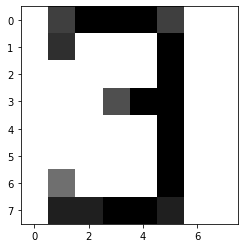

source data in 8x8:
 [[ 0 12 16 16 16 12  0  0]
 [ 0 13  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0 11 16 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  9  0  0  0 16  0  0]
 [ 0 14 14 16 16 14  0  0]]
[3]


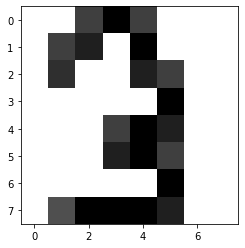

source data in 8x8:
 [[ 0  0 12 16 12  0  0  0]
 [ 0 12 14  0 16  0  0  0]
 [ 0 13  0  0 14 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0 12 16 14  0  0]
 [ 0  0  0 14 16 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0 11 16 16 16 14  0  0]]
[3]


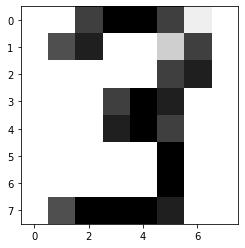

source data in 8x8:
 [[ 0  0 12 16 16 12  1  0]
 [ 0 11 14  0  0  3 12  0]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0  0 12 16 14  0  0]
 [ 0  0  0 14 16 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0 11 16 16 16 14  0  0]]
[3]


In [49]:
img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test3_1.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test3_2.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test3_3.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test3_4.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test3_5.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test3_6.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test3_7.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test3_8.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test3_9.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test3_10.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

# Predict 4's (60% Accuracy)

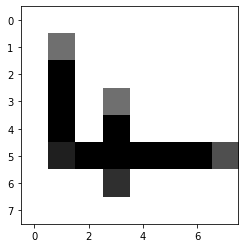

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  9  0  0  0  0]
 [ 0 16  0 16  0  0  0  0]
 [ 0 14 16 16 16 16 16 11]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[4]


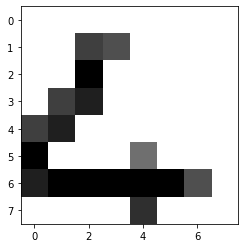

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0 12 11  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0 12 14  0  0  0  0  0]
 [12 14  0  0  0  0  0  0]
 [16  0  0  0  9  0  0  0]
 [14 16 16 16 16 16 11  0]
 [ 0  0  0  0 13  0  0  0]]
[0]


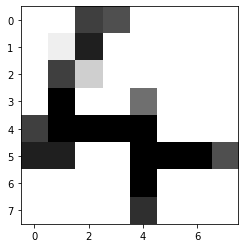

source data in 8x8:
 [[ 0  0 12 11  0  0  0  0]
 [ 0  1 14  0  0  0  0  0]
 [ 0 12  3  0  0  0  0  0]
 [ 0 16  0  0  9  0  0  0]
 [12 16 16 16 16  0  0  0]
 [14 14  0  0 16 16 16 11]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 13  0  0  0]]
[4]


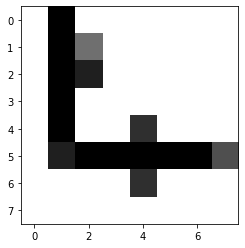

source data in 8x8:
 [[ 0 16  0  0  0  0  0  0]
 [ 0 16  9  0  0  0  0  0]
 [ 0 16 14  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  0 13  0  0  0]
 [ 0 14 16 16 16 16 16 11]
 [ 0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[4]


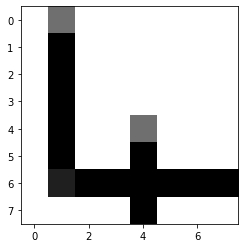

source data in 8x8:
 [[ 0  9  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  0  9  0  0  0]
 [ 0 16  0  0 16  0  0  0]
 [ 0 14 16 16 16 16 16 16]
 [ 0  0  0  0 16  0  0  0]]
[2]


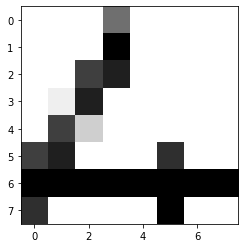

source data in 8x8:
 [[ 0  0  0  9  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0 12 14  0  0  0  0]
 [ 0  1 14  0  0  0  0  0]
 [ 0 12  3  0  0  0  0  0]
 [12 14  0  0  0 13  0  0]
 [16 16 16 16 16 16 16 16]
 [13  0  0  0  0 16  0  0]]
[6]


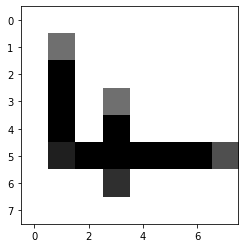

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  9  0  0  0  0]
 [ 0 16  0 16  0  0  0  0]
 [ 0 14 16 16 16 16 16 11]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[4]


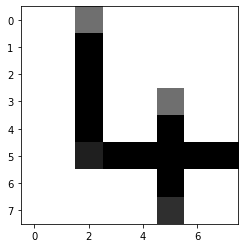

source data in 8x8:
 [[ 0  0  9  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  9  0  0]
 [ 0  0 16  0  0 16  0  0]
 [ 0  0 14 16 16 16 16 16]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 13  0  0]]
[6]


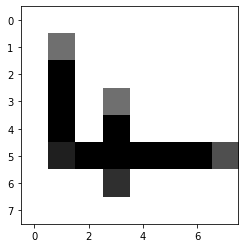

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  9  0  0  0  0]
 [ 0 16  0 16  0  0  0  0]
 [ 0 14 16 16 16 16 16 11]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[4]


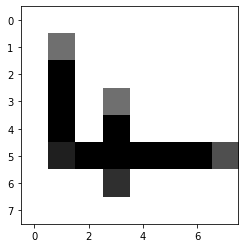

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  9  0  0  0  0]
 [ 0 16  0 16  0  0  0  0]
 [ 0 14 16 16 16 16 16 11]
 [ 0  0  0 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[4]


In [50]:
img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test4_1.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test4_2.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test4_3.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test4_4.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test4_5.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test4_6.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test4_7.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test4_8.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test4_9.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test4_10.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

# Predict 5's (100% Accuracy)

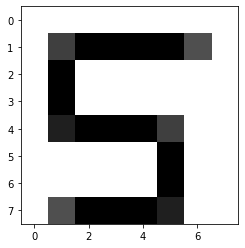

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0 12 16 16 16 16 11  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 14 16 16 16 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0 11 16 16 16 14  0  0]]
[5]


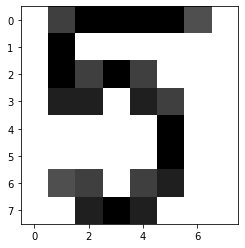

source data in 8x8:
 [[ 0 12 16 16 16 16 11  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16 12 16 12  0  0  0]
 [ 0 14 14  0 14 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0 11 12  0 12 14  0  0]
 [ 0  0 14 16 14  0  0  0]]
[5]


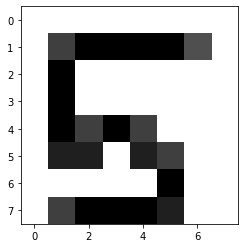

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0 12 16 16 16 16 11  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16 12 16 12  0  0  0]
 [ 0 14 14  0 14 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0 12 16 16 16 14  0  0]]
[5]


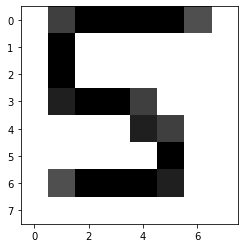

source data in 8x8:
 [[ 0 12 16 16 16 16 11  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 14 16 16 12  0  0  0]
 [ 0  0  0  0 14 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0 11 16 16 16 14  0  0]
 [ 0  0  0  0  0  0  0  0]]
[5]


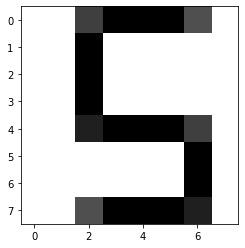

source data in 8x8:
 [[ 0  0 12 16 16 16 11  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 14 16 16 16 12  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0 11 16 16 16 14  0]]
[5]


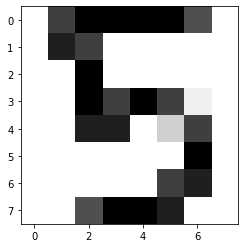

source data in 8x8:
 [[ 0 12 16 16 16 16 11  0]
 [ 0 14 12  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16 12 16 12  1  0]
 [ 0  0 14 14  0  3 12  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0 11 16 16 14  0  0]]
[5]


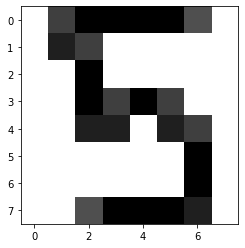

source data in 8x8:
 [[ 0 12 16 16 16 16 11  0]
 [ 0 14 12  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16 12 16 12  0  0]
 [ 0  0 14 14  0 14 12  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0 11 16 16 16 14  0]]
[5]


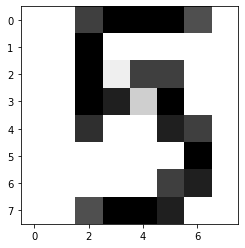

source data in 8x8:
 [[ 0  0 12 16 16 16 11  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  1 12 12  0  0]
 [ 0  0 16 14  3 16  0  0]
 [ 0  0 13  0  0 14 12  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0 11 16 16 14  0  0]]
[5]


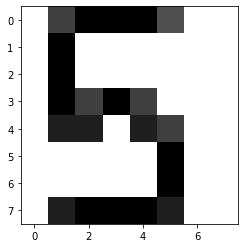

source data in 8x8:
 [[ 0 12 16 16 16 11  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16 12 16 12  0  0  0]
 [ 0 14 14  0 14 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0 14 16 16 16 14  0  0]]
[5]


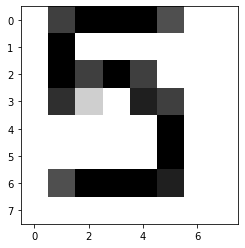

source data in 8x8:
 [[ 0 12 16 16 16 11  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16 12 16 12  0  0  0]
 [ 0 13  3  0 14 12  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0 11 16 16 16 14  0  0]
 [ 0  0  0  0  0  0  0  0]]
[5]


In [51]:
img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test5_1.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test5_2.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test5_3.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test5_4.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test5_5.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test5_6.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test5_7.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test5_8.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test5_9.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test5_10.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

# Predict 6's (70% Accuracy)

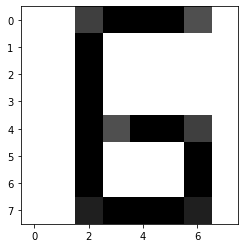

source data in 8x8:
 [[ 0  0 12 16 16 16 11  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16 11 16 16 12  0]
 [ 0  0 16  0  0  0 16  0]
 [ 0  0 16  0  0  0 16  0]
 [ 0  0 14 16 16 16 14  0]]
[6]


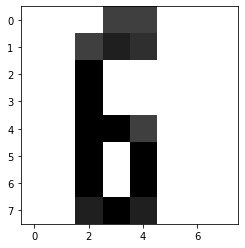

source data in 8x8:
 [[ 0  0  0 12 12  0  0  0]
 [ 0  0 12 14 13  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16 16 12  0  0  0]
 [ 0  0 16  0 16  0  0  0]
 [ 0  0 16  0 16  0  0  0]
 [ 0  0 14 16 14  0  0  0]]
[5]


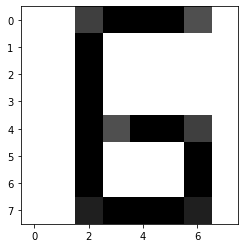

source data in 8x8:
 [[ 0  0 12 16 16 16 11  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16 11 16 16 12  0]
 [ 0  0 16  0  0  0 16  0]
 [ 0  0 16  0  0  0 16  0]
 [ 0  0 14 16 16 16 14  0]]
[6]


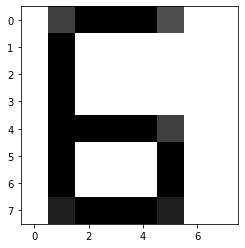

source data in 8x8:
 [[ 0 12 16 16 16 11  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16 16 16 16 12  0  0]
 [ 0 16  0  0  0 16  0  0]
 [ 0 16  0  0  0 16  0  0]
 [ 0 14 16 16 16 14  0  0]]
[5]


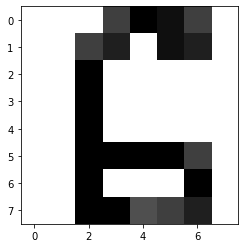

source data in 8x8:
 [[ 0  0  0 12 16 15 12  0]
 [ 0  0 12 14  0 15 14  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16 16 16 16 12  0]
 [ 0  0 16  0  0  0 16  0]
 [ 0  0 16 16 11 12 14  0]]
[6]


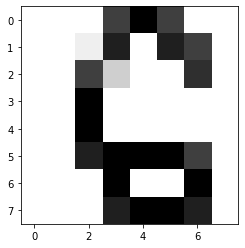

source data in 8x8:
 [[ 0  0  0 12 16 12  0  0]
 [ 0  0  1 14  0 14 12  0]
 [ 0  0 12  3  0  0 13  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 14 16 16 16 12  0]
 [ 0  0  0 16  0  0 16  0]
 [ 0  0  0 14 16 16 14  0]]
[6]


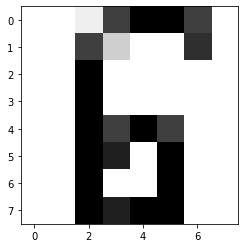

source data in 8x8:
 [[ 0  0  1 12 16 16 12  0]
 [ 0  0 12  3  0  0 13  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16 12 16 12  0  0]
 [ 0  0 16 14  0 16  0  0]
 [ 0  0 16  0  0 16  0  0]
 [ 0  0 16 14 16 16  0  0]]
[6]


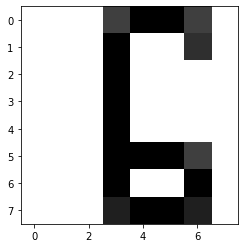

source data in 8x8:
 [[ 0  0  0 12 16 16 12  0]
 [ 0  0  0 16  0  0 13  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0  0 16 16 16 12  0]
 [ 0  0  0 16  0  0 16  0]
 [ 0  0  0 14 16 16 14  0]]
[6]


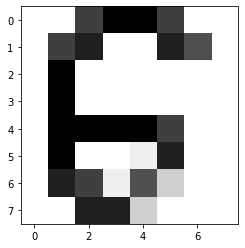

source data in 8x8:
 [[ 0  0 12 16 16 12  0  0]
 [ 0 12 14  0  0 14 11  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0 16 16 16 16 12  0  0]
 [ 0 16  0  0  1 14  0  0]
 [ 0 14 12  1 11  3  0  0]
 [ 0  0 14 14  3  0  0  0]]
[5]


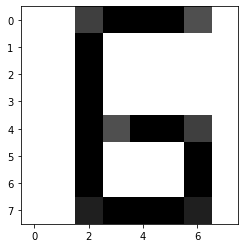

source data in 8x8:
 [[ 0  0 12 16 16 16 11  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0 16 11 16 16 12  0]
 [ 0  0 16  0  0  0 16  0]
 [ 0  0 16  0  0  0 16  0]
 [ 0  0 14 16 16 16 14  0]]
[6]


In [52]:
img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test6_1.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test6_2.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test6_3.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test6_4.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test6_5.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test6_6.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test6_7.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test6_8.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test6_9.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test6_10.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

# Predict 7's (100% Accuracy)

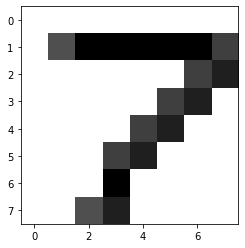

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0 11 16 16 16 16 16 12]
 [ 0  0  0  0  0  0 12 14]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0  0 16  0  0  0  0]
 [ 0  0 11 14  0  0  0  0]]
[7]


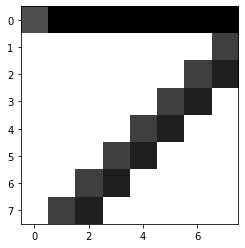

source data in 8x8:
 [[11 16 16 16 16 16 16 16]
 [ 0  0  0  0  0  0  0 12]
 [ 0  0  0  0  0  0 12 14]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0 12 14  0  0  0  0]
 [ 0 12 14  0  0  0  0  0]]
[7]


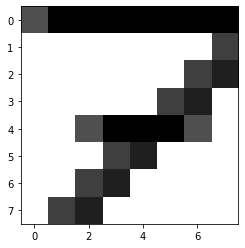

source data in 8x8:
 [[11 16 16 16 16 16 16 16]
 [ 0  0  0  0  0  0  0 12]
 [ 0  0  0  0  0  0 12 14]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0 11 16 16 16 11  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0 12 14  0  0  0  0]
 [ 0 12 14  0  0  0  0  0]]
[7]


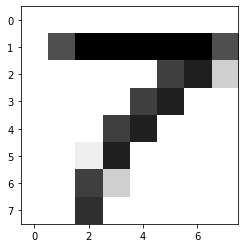

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0 11 16 16 16 16 16 11]
 [ 0  0  0  0  0 12 14  3]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0  1 14  0  0  0  0]
 [ 0  0 12  3  0  0  0  0]
 [ 0  0 13  0  0  0  0  0]]
[7]


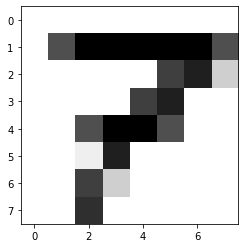

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0 11 16 16 16 16 16 11]
 [ 0  0  0  0  0 12 14  3]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0 11 16 16 11  0  0]
 [ 0  0  1 14  0  0  0  0]
 [ 0  0 12  3  0  0  0  0]
 [ 0  0 13  0  0  0  0  0]]
[7]


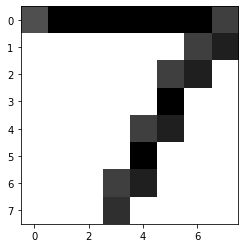

source data in 8x8:
 [[11 16 16 16 16 16 16 12]
 [ 0  0  0  0  0  0 12 14]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0  0 13  0  0  0  0]]
[7]


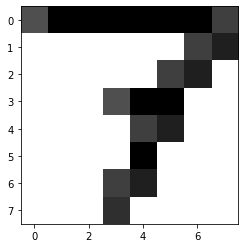

source data in 8x8:
 [[11 16 16 16 16 16 16 12]
 [ 0  0  0  0  0  0 12 14]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0  0 11 16 16  0  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0  0 13  0  0  0  0]]
[7]


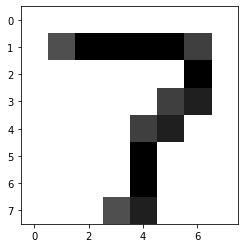

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0 11 16 16 16 16 12  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0 11 14  0  0  0]]
[7]


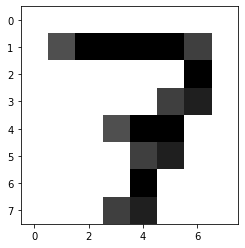

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0 11 16 16 16 16 12  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0  0 11 16 16  0  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0 12 14  0  0  0]]
[7]


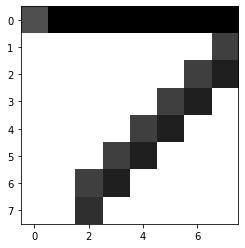

source data in 8x8:
 [[11 16 16 16 16 16 16 16]
 [ 0  0  0  0  0  0  0 12]
 [ 0  0  0  0  0  0 12 14]
 [ 0  0  0  0  0 12 14  0]
 [ 0  0  0  0 12 14  0  0]
 [ 0  0  0 12 14  0  0  0]
 [ 0  0 12 14  0  0  0  0]
 [ 0  0 13  0  0  0  0  0]]
[7]


In [53]:
img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test7_1.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test7_2.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test7_3.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test7_4.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test7_5.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test7_6.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test7_7.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test7_8.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test7_9.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test7_10.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

# Predict 8's (60% Accuracy)

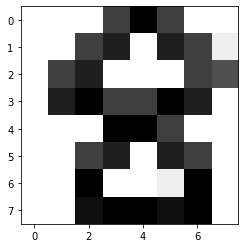

source data in 8x8:
 [[ 0  0  0 12 16 12  0  0]
 [ 0  0 12 14  0 14 12  1]
 [ 0 12 14  0  0  0 12 11]
 [ 0 14 16 12 12 16 14  0]
 [ 0  0  0 16 16 12  0  0]
 [ 0  0 12 14  0 14 12  0]
 [ 0  0 16  0  0  1 16  0]
 [ 0  0 15 16 16 15 16  0]]
[8]


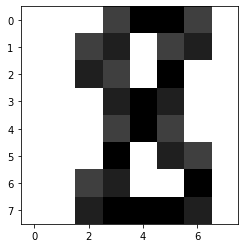

source data in 8x8:
 [[ 0  0  0 12 16 16 12  0]
 [ 0  0 12 14  0 12 14  0]
 [ 0  0 14 12  0 16  0  0]
 [ 0  0  0 14 16 14  0  0]
 [ 0  0  0 12 16 12  0  0]
 [ 0  0  0 16  0 14 12  0]
 [ 0  0 12 14  0  0 16  0]
 [ 0  0 14 16 16 16 14  0]]
[8]


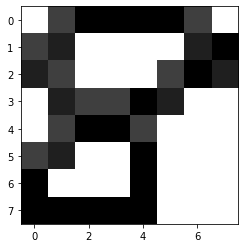

source data in 8x8:
 [[ 0 12 16 16 16 16 12  0]
 [12 14  0  0  0  0 14 16]
 [14 12  0  0  0 12 16 14]
 [ 0 14 12 12 16 14  0  0]
 [ 0 12 16 16 12  0  0  0]
 [12 14  0  0 16  0  0  0]
 [16  0  0  0 16  0  0  0]
 [16 16 16 16 16  0  0  0]]
[5]


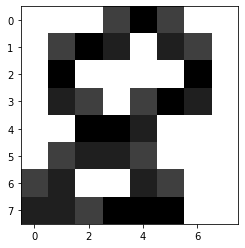

source data in 8x8:
 [[ 0  0  0 12 16 12  0  0]
 [ 0 12 16 14  0 14 12  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 14 12  0 12 16 14  0]
 [ 0  0 16 16 14  0  0  0]
 [ 0 12 14 14 12  0  0  0]
 [12 14  0  0 14 12  0  0]
 [14 14 12 16 16 16  0  0]]
[8]


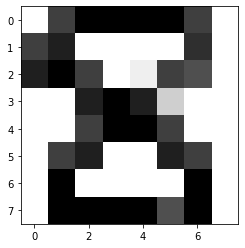

source data in 8x8:
 [[ 0 12 16 16 16 16 12  0]
 [12 14  0  0  0  0 13  0]
 [14 16 12  0  1 12 11  0]
 [ 0  0 14 16 14  3  0  0]
 [ 0  0 12 16 16 12  0  0]
 [ 0 12 14  0  0 14 12  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 16 16 16 16 11 16  0]]
[8]


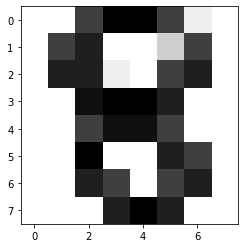

source data in 8x8:
 [[ 0  0 12 16 16 12  1  0]
 [ 0 12 14  0  0  3 12  0]
 [ 0 14 14  1  0 12 14  0]
 [ 0  0 15 16 16 14  0  0]
 [ 0  0 12 15 15 12  0  0]
 [ 0  0 16  0  0 14 12  0]
 [ 0  0 14 12  0 12 14  0]
 [ 0  0  0 14 16 14  0  0]]
[8]


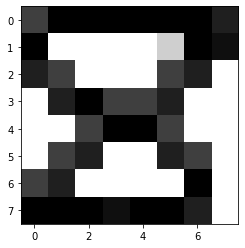

source data in 8x8:
 [[12 16 16 16 16 16 16 14]
 [16  0  0  0  0  3 16 15]
 [14 12  0  0  0 12 14  0]
 [ 0 14 16 12 12 14  0  0]
 [ 0  0 12 16 16 12  0  0]
 [ 0 12 14  0  0 14 12  0]
 [12 14  0  0  0  0 16  0]
 [16 16 16 15 16 16 14  0]]
[9]


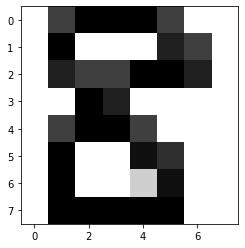

source data in 8x8:
 [[ 0 12 16 16 16 12  0  0]
 [ 0 16  0  0  0 14 12  0]
 [ 0 14 12 12 16 16 14  0]
 [ 0  0 16 14  0  0  0  0]
 [ 0 12 16 16 12  0  0  0]
 [ 0 16  0  0 15 13  0  0]
 [ 0 16  0  0  3 15  0  0]
 [ 0 16 16 16 16 16  0  0]]
[3]


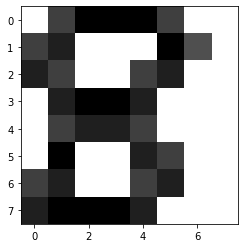

source data in 8x8:
 [[ 0 12 16 16 16 12  0  0]
 [12 14  0  0  0 16 11  0]
 [14 12  0  0 12 14  0  0]
 [ 0 14 16 16 14  0  0  0]
 [ 0 12 14 14 12  0  0  0]
 [ 0 16  0  0 14 12  0  0]
 [12 14  0  0 12 14  0  0]
 [14 16 16 16 14  0  0  0]]
[3]


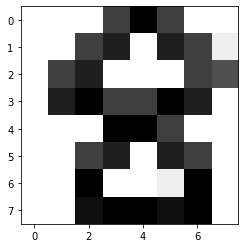

source data in 8x8:
 [[ 0  0  0 12 16 12  0  0]
 [ 0  0 12 14  0 14 12  1]
 [ 0 12 14  0  0  0 12 11]
 [ 0 14 16 12 12 16 14  0]
 [ 0  0  0 16 16 12  0  0]
 [ 0  0 12 14  0 14 12  0]
 [ 0  0 16  0  0  1 16  0]
 [ 0  0 15 16 16 15 16  0]]
[8]


In [54]:
img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test8_1.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test8_2.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test8_3.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test8_4.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test8_5.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test8_6.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test8_7.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test8_8.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test8_9.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test8_10.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

# Predict 9's (60% Accuracy)

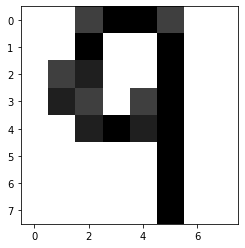

source data in 8x8:
 [[ 0  0 12 16 16 12  0  0]
 [ 0  0 16  0  0 16  0  0]
 [ 0 12 14  0  0 16  0  0]
 [ 0 14 12  0 12 16  0  0]
 [ 0  0 14 16 14 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]]
[9]


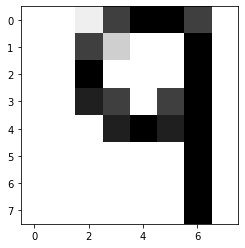

source data in 8x8:
 [[ 0  0  1 12 16 16 12  0]
 [ 0  0 12  3  0  0 16  0]
 [ 0  0 16  0  0  0 16  0]
 [ 0  0 14 12  0 12 16  0]
 [ 0  0  0 14 16 14 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]]
[7]


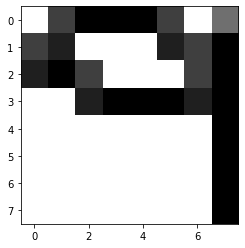

source data in 8x8:
 [[ 0 12 16 16 16 12  0  9]
 [12 14  0  0  0 14 12 16]
 [14 16 12  0  0  0 12 16]
 [ 0  0 14 16 16 16 14 16]
 [ 0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0 16]]
[9]


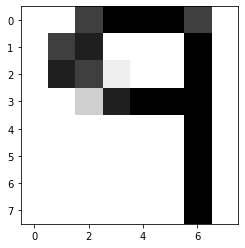

source data in 8x8:
 [[ 0  0 12 16 16 16 12  0]
 [ 0 12 14  0  0  0 16  0]
 [ 0 14 12  1  0  0 16  0]
 [ 0  0  3 14 16 16 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]]
[9]


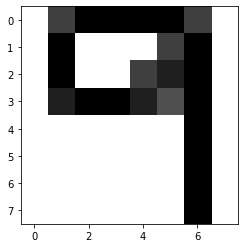

source data in 8x8:
 [[ 0 12 16 16 16 16 12  0]
 [ 0 16  0  0  0 12 16  0]
 [ 0 16  0  0 12 14 16  0]
 [ 0 14 16 16 14 11 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]]
[9]


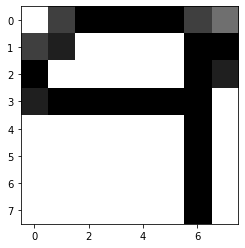

source data in 8x8:
 [[ 0 12 16 16 16 16 12  9]
 [12 14  0  0  0  0 16 16]
 [16  0  0  0  0  0 16 14]
 [14 16 16 16 16 16 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0  0  0  0 16  0]]
[5]


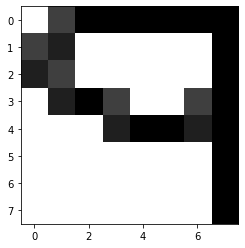

source data in 8x8:
 [[ 0 12 16 16 16 16 16 16]
 [12 14  0  0  0  0  0 16]
 [14 12  0  0  0  0  0 16]
 [ 0 14 16 12  0  0 12 16]
 [ 0  0  0 14 16 16 14 16]
 [ 0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0 16]]
[5]


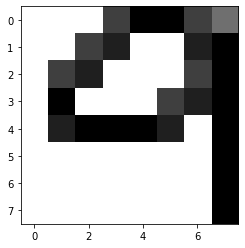

source data in 8x8:
 [[ 0  0  0 12 16 16 12  9]
 [ 0  0 12 14  0  0 14 16]
 [ 0 12 14  0  0  0 12 16]
 [ 0 16  0  0  0 12 14 16]
 [ 0 14 16 16 16 14  0 16]
 [ 0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0 16]
 [ 0  0  0  0  0  0  0 16]]
[7]


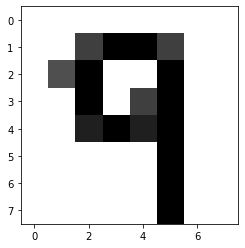

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0 12 16 16 12  0  0]
 [ 0 11 16  0  0 16  0  0]
 [ 0  0 16  0 12 16  0  0]
 [ 0  0 14 16 14 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]]
[9]


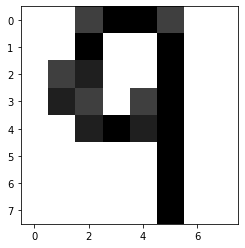

source data in 8x8:
 [[ 0  0 12 16 16 12  0  0]
 [ 0  0 16  0  0 16  0  0]
 [ 0 12 14  0  0 16  0  0]
 [ 0 14 12  0 12 16  0  0]
 [ 0  0 14 16 14 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0 16  0  0]]
[9]


In [56]:
img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test9_1.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test9_2.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test9_3.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test9_4.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test9_5.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test9_6.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test9_7.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test9_8.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test9_9.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test9_10.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

# Predict 0's (100% Accuracy)

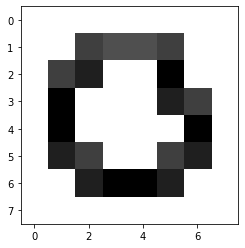

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0 12 11 11 12  0  0]
 [ 0 12 14  0  0 16  0  0]
 [ 0 16  0  0  0 14 12  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 14 12  0  0 12 14  0]
 [ 0  0 14 16 16 14  0  0]
 [ 0  0  0  0  0  0  0  0]]
[0]


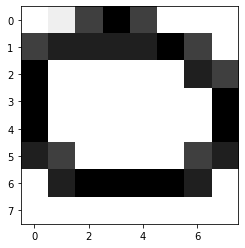

source data in 8x8:
 [[ 0  1 12 16 12  0  0  0]
 [12 14 14 14 14 16 12  0]
 [16  0  0  0  0  0 14 12]
 [16  0  0  0  0  0  0 16]
 [16  0  0  0  0  0  0 16]
 [14 12  0  0  0  0 12 14]
 [ 0 14 16 16 16 16 14  0]
 [ 0  0  0  0  0  0  0  0]]
[0]


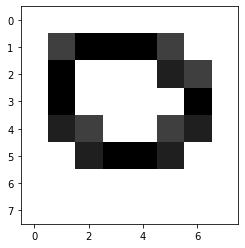

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0 12 16 16 16 12  0  0]
 [ 0 16  0  0  0 14 12  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 14 12  0  0 12 14  0]
 [ 0  0 14 16 16 14  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[0]


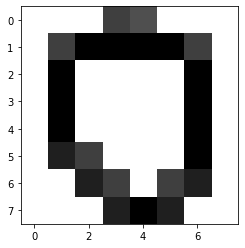

source data in 8x8:
 [[ 0  0  0 12 11  0  0  0]
 [ 0 12 16 16 16 16 12  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 14 12  0  0  0 16  0]
 [ 0  0 14 12  0 12 14  0]
 [ 0  0  0 14 16 14  0  0]]
[0]


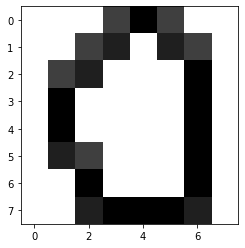

source data in 8x8:
 [[ 0  0  0 12 16 12  0  0]
 [ 0  0 12 14  0 14 12  0]
 [ 0 12 14  0  0  0 16  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 14 12  0  0  0 16  0]
 [ 0  0 16  0  0  0 16  0]
 [ 0  0 14 16 16 16 14  0]]
[0]


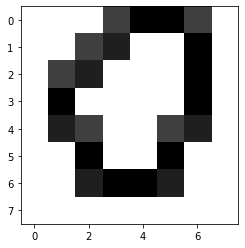

source data in 8x8:
 [[ 0  0  0 12 16 16 12  0]
 [ 0  0 12 14  0  0 16  0]
 [ 0 12 14  0  0  0 16  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 14 12  0  0 12 14  0]
 [ 0  0 16  0  0 16  0  0]
 [ 0  0 14 16 16 14  0  0]
 [ 0  0  0  0  0  0  0  0]]
[0]


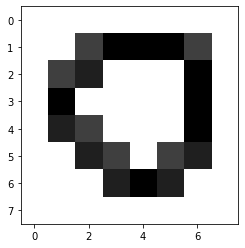

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0 12 16 16 16 12  0]
 [ 0 12 14  0  0  0 16  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 14 12  0  0  0 16  0]
 [ 0  0 14 12  0 12 14  0]
 [ 0  0  0 14 16 14  0  0]
 [ 0  0  0  0  0  0  0  0]]
[0]


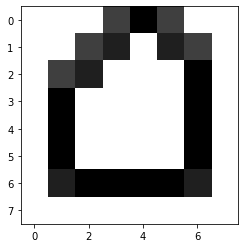

source data in 8x8:
 [[ 0  0  0 12 16 12  0  0]
 [ 0  0 12 14  0 14 12  0]
 [ 0 12 14  0  0  0 16  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 16  0  0  0  0 16  0]
 [ 0 14 16 16 16 16 14  0]
 [ 0  0  0  0  0  0  0  0]]
[0]


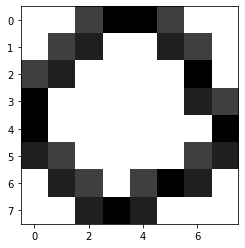

source data in 8x8:
 [[ 0  0 12 16 16 12  0  0]
 [ 0 12 14  0  0 14 12  0]
 [12 14  0  0  0  0 16  0]
 [16  0  0  0  0  0 14 12]
 [16  0  0  0  0  0  0 16]
 [14 12  0  0  0  0 12 14]
 [ 0 14 12  0 12 16 14  0]
 [ 0  0 14 16 14  0  0  0]]
[0]


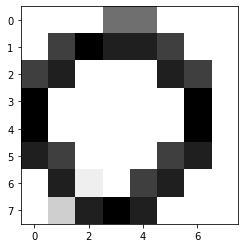

source data in 8x8:
 [[ 0  0  0  9  9  0  0  0]
 [ 0 12 16 14 14 12  0  0]
 [12 14  0  0  0 14 12  0]
 [16  0  0  0  0  0 16  0]
 [16  0  0  0  0  0 16  0]
 [14 12  0  0  0 12 14  0]
 [ 0 14  1  0 12 14  0  0]
 [ 0  3 14 16 14  0  0  0]]
[0]


In [74]:
img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test0_1.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test0_2.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test0_3.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test0_4.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test0_5.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test0_6.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test0_7.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test0_8.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test0_9.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)

img = mpimg.imread(r"C:\Users\shane\Desktop\ML Project\data\test0_10.png")
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)
predicted = knn.predict(a.flatten().reshape(1, -1))
print(predicted)